In [1]:
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from analysis_utils import *
from data_analysis import *

In [2]:
with open("./data/ping/target_device#1.txt") as f:
    dump = f.read()

# Plot the series of ping RTTs 

In [3]:
s = pd.Series(dump_to_rtt_list(dump))
s = s.apply(lambda x : float(x) if isinstance(x, float) else  np.inf)

<AxesSubplot:title={'center':'Rtt For Each Ping Req'}, xlabel='ping number', ylabel='RTT (ms)'>

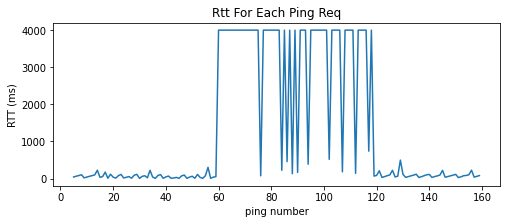

In [5]:
fig, ax = plt.subplots(figsize=(8,3))
ax.set_xlabel("ping number")
ax.set_ylabel("RTT (ms)")
ax.set_title("RTT for each ping req".title())
s.plot(ax=ax)